__Assignment - Week 8__

__Name__: Runze Li

__net id__: rl50xx

First, we load the dataset, and we draw the heatmap which indicates the correlation between `Rented Bike Count` and other features. In the heapmap, we find that the two features `Hour` and `Temperature(°C)` are highly correlated with `Rented Bike Count`.

Using Linear regression and Random Forest regression to train the dataset, we can get the result:

- Linear Regression Accuracy: 55.72%
- Random Forest Regression Accuracy: 88.12%

According to the result, we can find that random forest can capture patterns that are not linear, and adapt to complex data.

### Download the bike-sharing-demand dataset:

https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

### Pick a number of features that you think may be correlated to each other and plot pairs of them to confirm that they are correlated. 

In [2]:
# Try different encodings because we're not sure which encoding method is suitable.
encodings = ['ISO-8859-1', 'cp1252', 'utf-16']

for enc in encodings:
    try:
        df = pd.read_csv("SeoulBikeData.csv", encoding=enc)
        print(f"Success with encoding: {enc}")
        break
    except Exception as e:
        print(f"Failed with encoding: {enc}. Error: {e}")

Success with encoding: ISO-8859-1


In [3]:
df = pd.read_csv("SeoulBikeData.csv", encoding='ISO-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Check for NaN values in DataFrame
nan_values = df.isna().any()
print("Are there NaN values:", nan_values.any())

Are there NaN values: False


In [5]:
print("Number of Samples:", df.shape[0])
print("Number of features:", df.shape[1])

Number of Samples: 8760
Number of features: 14


In [6]:
print("Feature data types:")
print(df.dtypes)

Feature data types:
Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


#### Encode non-numeric values

Here we find that Date, Seasons, Holiday and Functioning Day are object types, so we need to convert them to numeric types.

In [7]:
df[['Month', 'Day', 'Year']] = df['Date'].str.split('/', expand=True)
df = df.drop(columns=['Date'])
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


In [8]:
_, df['Seasons'] = np.unique(df['Seasons'].values, return_inverse=True)
_, df['Holiday'] = np.unique(df['Holiday'].values, return_inverse=True)
_, df['Functioning Day'] = np.unique(df['Functioning Day'].values, return_inverse=True)

df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,01,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,01,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,01,12,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,01,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,01,12,2017


#### Plot heatmap

<Axes: >

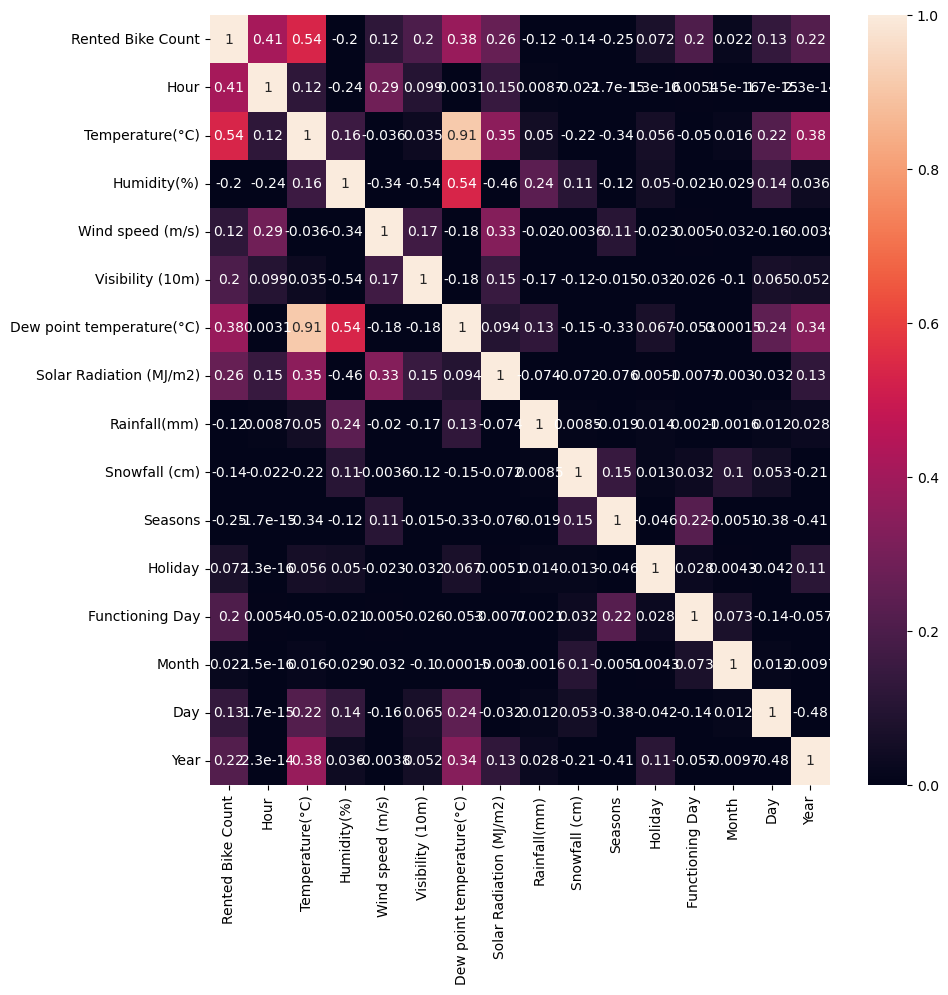

In [9]:
from seaborn import heatmap

plt.figure(figsize=(10,10))
heatmap(df.corr(), vmin=0, vmax=1, annot=True, color='Red')

In this heat map, each cell represents the correlation coefficient between the two variables specified by the row and column labels. Values which are close to 1 indicate a strong positive correlation, while those close to 0 indicate almost no linear correlation.

According to the heatmap, we find that the two features `Hour` and `Temperature(°C)` are highly correlated with `Rented Bike Count`. 

### Pick several features that you think might be correlated with the demand (rented bike count) and plot to confirm that they are correlated. 

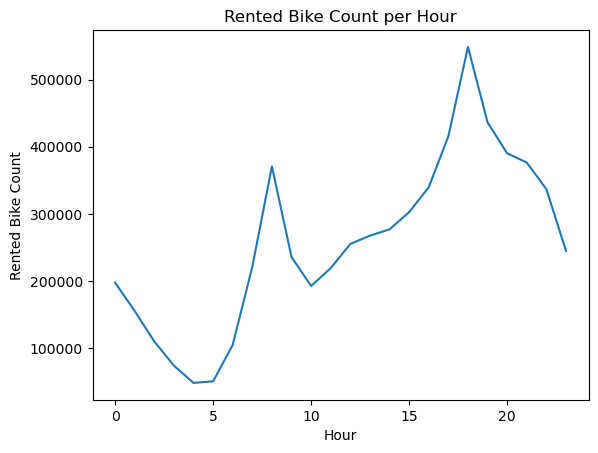

In [23]:
hourly_sum = []
for i in range(0, 24):
    data_hourly = df[df["Hour"] == i]
    sum = data_hourly['Rented Bike Count'].sum()
    hourly_sum.append(sum)

plt.plot(np.arange(0, 24), hourly_sum)
plt.xlabel("Hour")
plt.ylabel("Rented Bike Count")
plt.title("Rented Bike Count per Hour")
plt.show()

In [22]:
import math

df['Temperature(°C)'] = np.floor(df['Temperature(°C)'])
print(f"Min temperature: {df['Temperature(°C)'].min()}°C")
print(f"Max temperature: {df['Temperature(°C)'].max()}°C")
df.head()

Min temperature: -18.0°C
Max temperature: 39.0°C


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day,Year
0,254,0,-6.0,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,01,12,2017
1,204,1,-6.0,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,01,12,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,01,12,2017
3,107,3,-7.0,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,01,12,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,01,12,2017


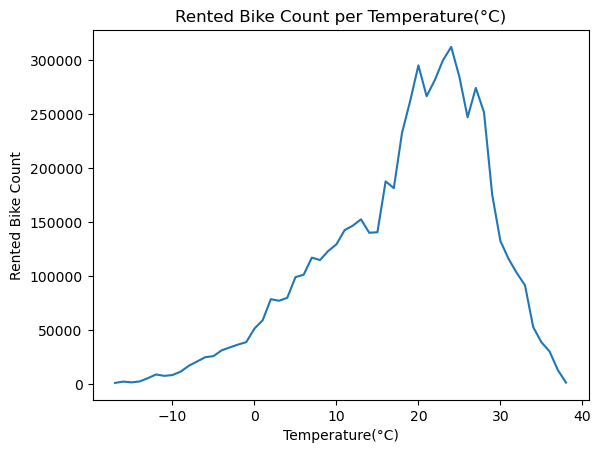

In [24]:
temperature_sum = []
for i in np.arange(-17, 39):
    data_temperature = df[df["Temperature(°C)"] == i]
    sum = data_temperature['Rented Bike Count'].sum()
    temperature_sum.append(sum)

plt.plot(np.arange(-17, 39), temperature_sum)
plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.title("Rented Bike Count per Temperature(°C)")
plt.show()

### Separate the data into training, validation, and test sets.

In [25]:
X = df.iloc[:, 1:]
y = df['Rented Bike Count']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

### Apply Linear regression and Random Forest regression methods to predict rented bike count using Scikit learn. 

### Quantify how good a job each method did in predicting the value of the dependent variable (using your test data set). Discuss why you believe each method performed as it did. 

#### Linear regression

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
lin_reg.coef_, lin_reg.intercept_

(array([ 2.63619939e+01,  1.83384586e+01, -1.13125782e+01,  2.36424104e+01,
         1.18537913e-02,  1.27234432e+01, -8.71079541e+01, -5.50062165e+01,
         4.16024606e+01, -1.04619896e+02,  1.34031210e+02,  9.65385080e+02,
        -1.09086914e+00,  1.91368989e+00, -5.29100170e+01]),
 106645.74148641468)

In [49]:
y_hat = lin_reg.predict(X_test)

In [50]:
score=lin_reg.score(X_test, y_test)
print(f"Linear regression score: {score}")

Linear regression score: 0.5572942813568151


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2, mse, mae
print(f"R2: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")

R2: 0.5572942813568151
MSE: 184042.72018672677
MAE: 320.72643565541193


To quantify how well each model performs in predicting the value of the dependent variable, we need to use some statistical metric to measure the accuracy of the predictions:

- Coefficient of determination (R2): A statistical indicator indicating the predictive ability of the model, with a maximum value of 1.
- Mean Absolute Error (MAE): The average of the absolute value of the difference between the predicted and actual values.
- Mean Square Error (MSE): The average of the squares of the differences between predicted and actual values.

In [52]:
df2 = pd.DataFrame({'Actual Quality': y_test, 'Predicted Quality': y_hat[:len(y_test)]})
df2.head()

,Actual Quality,Predicted Quality
1737,126,117.304899
8670,317,273.124171
7908,29,575.902533
740,161,560.308908
7619,1056,983.340035


Text(0.5, 1.0, 'Ground Truth vs Predicted')

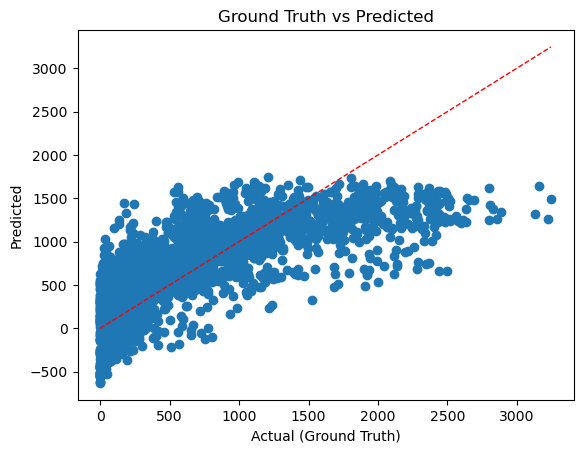

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")

#### Random Forest regression

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000)

rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

errors = abs(y_hat - y_test)
acc = 1 - errors

score=rf.score(X_test, y_test)
mean=np.mean(acc)
print(f"Linear regression score: {score}")
print(f"Mean: {mean}")

Linear regression score: 0.8812231310301206
Mean: -132.62078729071538


Text(0.5, 1.0, 'Ground Truth vs Predicted')

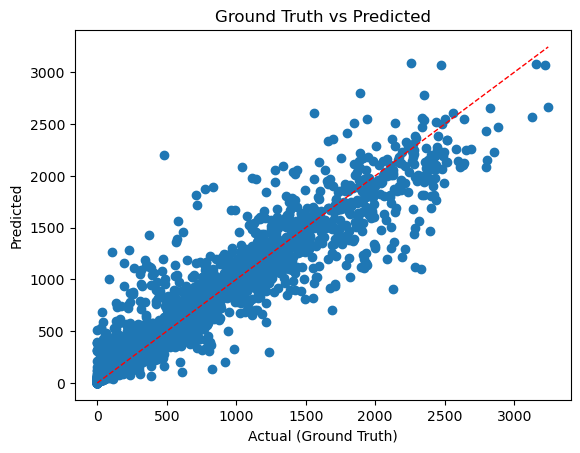

In [55]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")

### Upload your .ipynb file to Brightspace. Include your discussions (Step 6.) in either a Word or pdf file or (preferably) in a cell (or cells) in your notebook with your code.